In [1]:
print("Hello world")

Hello world


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
original_data = pd.read_csv(
    r"D:\College\SEM-8\final-project\data\test data\tabular-actgan-65d5ecd0c8fb3ea751ae69f8-data_preview.csv"
)

In [4]:
original_data

,Instance ID,Service,File Size,Programming Language,Framework,Network Traffic,Storage Used,Recommended Instance Type
0,i-3456789abcdef3,Database,5 MB,Python,Django,40 MB/s,5 GB,t2.micro
1,i-89abcdef8,API Gateway,500 MB,SQL,NaN,10 MB/s,100 GB,t2.medium
2,i-56789abcdef5,Data Streaming,10 MB,SQL,NaN,30 MB/s,5 GB,t2.micro
3,i-cdef0123456789ab,Content Management System (CMS),10 MB,Python,Django,5 MB/s,50 GB,t2.micro
4,i-9abcdef9,Serverless Function,10 GB,Java,TensorFlow,40 MB/s,10 GB,t2.small
...,...,...,...,...,...,...,...,...
4995,i-89abcdef8,Static Content Delivery Network (CDN),100 MB,Python,Varies,50 MB/s,100 GB,m5.large
4996,i-fedcba0987654321,Content Management System (CMS),10 GB,SQL,NaN,10 MB/s,20 GB,t2.medium
4997,i-6789abcdef6,Data Streaming,100 MB,Python,Node.js,5 MB/s,2 GB,t2.small
4998,i-3456789abcdef3,Serverless Function,5 MB,Python,Varies,50 MB/s,2 GB,t2.small


In [5]:
# Let's remove the columns that are of no use

In [6]:
new_data = original_data.drop(["Instance ID", "Network Traffic"], axis=1)

In [7]:
new_data

,Service,File Size,Programming Language,Framework,Storage Used,Recommended Instance Type
0,Database,5 MB,Python,Django,5 GB,t2.micro
1,API Gateway,500 MB,SQL,NaN,100 GB,t2.medium
2,Data Streaming,10 MB,SQL,NaN,5 GB,t2.micro
3,Content Management System (CMS),10 MB,Python,Django,50 GB,t2.micro
4,Serverless Function,10 GB,Java,TensorFlow,10 GB,t2.small
...,...,...,...,...,...,...
4995,Static Content Delivery Network (CDN),100 MB,Python,Varies,100 GB,m5.large
4996,Content Management System (CMS),10 GB,SQL,NaN,20 GB,t2.medium
4997,Data Streaming,100 MB,Python,Node.js,2 GB,t2.small
4998,Serverless Function,5 MB,Python,Varies,2 GB,t2.small


In [8]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Service                    5000 non-null   object
 1   File Size                  5000 non-null   object
 2   Programming Language       5000 non-null   object
 3   Framework                  4020 non-null   object
 4   Storage Used               5000 non-null   object
 5   Recommended Instance Type  5000 non-null   object
dtypes: object(6)
memory usage: 234.5+ KB


In [9]:
file_size_original = new_data['File Size'].values

In [10]:
# file_size_original_formats = []
file_size_in_gb = []



for i in file_size_original:
    # file_size_original_formats.append(i.split(" ")[1])

    if i.split(" ")[1] == "MB":

        # print(int(i.split(' ')[0])/1024)
        file_size_in_gb.append(int(i.split(" ")[0]) / 1024)

    elif i.split(" ")[1] == "KB/s":
        # print(int(i.split(" ")[0]) / (1024 * 1024))
        file_size_in_gb.append(int(i.split(" ")[0]) / (1024 * 1024))

    elif i.split(" ")[1] == "GB":
        # print(i.split(" ")[0])
        file_size_in_gb.append(int(i.split(" ")[0]))

    else:
        print("Invalid format")

In [11]:
list(set(file_size_original_formats))

NameError: name 'file_size_original_formats' is not defined

In [12]:
new_data['File Size'][10]

'10 GB'

In [13]:
file_size_in_gb[10]

10

In [14]:
from random import randint

In [15]:
randint(0, len(new_data["File Size"]))

3628

In [16]:
new_data["File Size"][2880]

'200 MB'

In [17]:
file_size_in_gb[2880]

0.1953125

In [18]:
new_data['File Size GB'] = file_size_in_gb

In [19]:
new_data

,Service,File Size,Programming Language,Framework,Storage Used,Recommended Instance Type,File Size GB
0,Database,5 MB,Python,Django,5 GB,t2.micro,0.004883
1,API Gateway,500 MB,SQL,NaN,100 GB,t2.medium,0.488281
2,Data Streaming,10 MB,SQL,NaN,5 GB,t2.micro,0.009766
3,Content Management System (CMS),10 MB,Python,Django,50 GB,t2.micro,0.009766
4,Serverless Function,10 GB,Java,TensorFlow,10 GB,t2.small,10.000000
...,...,...,...,...,...,...,...
4995,Static Content Delivery Network (CDN),100 MB,Python,Varies,100 GB,m5.large,0.097656
4996,Content Management System (CMS),10 GB,SQL,NaN,20 GB,t2.medium,10.000000
4997,Data Streaming,100 MB,Python,Node.js,2 GB,t2.small,0.097656
4998,Serverless Function,5 MB,Python,Varies,2 GB,t2.small,0.004883


In [20]:
storage_used_original = new_data['Storage Used']

In [21]:
# file_size_original_formats = []
storage_used_in_gb = []


for i in storage_used_original:
    # file_size_original_formats.append(i.split(" ")[1])
    # print(i.split(" ")[1])
    storage_used_in_gb.append(int(i.split(" ")[0]))
    # if i.split(" ")[1] == "MB":

    #     # print(int(i.split(' ')[0])/1024)
    #     file_size_in_gb.append(int(i.split(" ")[0]) / 1024)

    # elif i.split(" ")[1] == "KB/s":
    #     # print(int(i.split(" ")[0]) / (1024 * 1024))
    #     file_size_in_gb.append(int(i.split(" ")[0]) / (1024 * 1024))

    # elif i.split(" ")[1] == "GB":
    #     # print(i.split(" ")[0])
    #     file_size_in_gb.append(int(i.split(" ")[0]))

    # else:
    #     print("Invalid format")

In [22]:
for i in range(len(storage_used_in_gb)):
    print(int(storage_used_original[i].split(" ")[0]) == storage_used_in_gb[i])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [23]:
storage_used_in_gb

[5,
 100,
 5,
 50,
 10,
 2,
 10,
 50,
 100,
 10,
 100,
 1,
 5,
 2,
 10,
 5,
 20,
 10,
 2,
 100,
 10,
 20,
 5,
 1,
 2,
 10,
 5,
 10,
 20,
 20,
 10,
 100,
 2,
 10,
 5,
 5,
 20,
 2,
 5,
 20,
 10,
 2,
 100,
 10,
 100,
 100,
 100,
 5,
 20,
 20,
 100,
 10,
 10,
 10,
 2,
 1,
 5,
 1,
 10,
 10,
 100,
 5,
 100,
 100,
 100,
 10,
 20,
 1,
 5,
 5,
 20,
 10,
 20,
 2,
 100,
 5,
 100,
 10,
 50,
 5,
 100,
 20,
 10,
 2,
 10,
 5,
 2,
 20,
 20,
 10,
 10,
 2,
 100,
 2,
 20,
 10,
 5,
 10,
 100,
 10,
 2,
 20,
 10,
 20,
 2,
 20,
 10,
 5,
 100,
 10,
 100,
 2,
 1,
 50,
 100,
 1,
 2,
 2,
 50,
 2,
 5,
 100,
 5,
 5,
 5,
 100,
 2,
 100,
 5,
 5,
 2,
 10,
 50,
 2,
 5,
 10,
 10,
 20,
 100,
 20,
 100,
 50,
 20,
 20,
 100,
 50,
 2,
 100,
 5,
 10,
 5,
 20,
 5,
 100,
 5,
 2,
 2,
 50,
 5,
 2,
 10,
 5,
 5,
 20,
 50,
 10,
 10,
 20,
 10,
 1,
 100,
 10,
 100,
 20,
 5,
 100,
 5,
 20,
 10,
 10,
 5,
 20,
 100,
 5,
 10,
 2,
 2,
 100,
 100,
 10,
 5,
 20,
 10,
 20,
 20,
 5,
 50,
 2,
 10,
 1,
 2,
 5,
 2,
 50,
 1,
 100,
 10,
 5,
 5,
 

In [24]:
new_data['Storage Used GB'] = storage_used_in_gb

In [25]:
new_data

,Service,File Size,Programming Language,Framework,Storage Used,Recommended Instance Type,File Size GB,Storage Used GB
0,Database,5 MB,Python,Django,5 GB,t2.micro,0.004883,5
1,API Gateway,500 MB,SQL,NaN,100 GB,t2.medium,0.488281,100
2,Data Streaming,10 MB,SQL,NaN,5 GB,t2.micro,0.009766,5
3,Content Management System (CMS),10 MB,Python,Django,50 GB,t2.micro,0.009766,50
4,Serverless Function,10 GB,Java,TensorFlow,10 GB,t2.small,10.000000,10
...,...,...,...,...,...,...,...,...
4995,Static Content Delivery Network (CDN),100 MB,Python,Varies,100 GB,m5.large,0.097656,100
4996,Content Management System (CMS),10 GB,SQL,NaN,20 GB,t2.medium,10.000000,20
4997,Data Streaming,100 MB,Python,Node.js,2 GB,t2.small,0.097656,2
4998,Serverless Function,5 MB,Python,Varies,2 GB,t2.small,0.004883,2


In [26]:
new_data['Framework'].value_counts()

Framework
Varies          548
AWS Lambda      535
Go kit          482
Apache Kafka    351
Spring Batch    344
TensorFlow      315
React           279
Flask-Mail      258
Node.js         254
Flask           227
Django          219
Apache Spark    208
Name: count, dtype: int64

In [27]:
new_data["Framework"]

0             Django
1                NaN
2                NaN
3             Django
4         TensorFlow
            ...     
4995          Varies
4996             NaN
4997         Node.js
4998          Varies
4999    Spring Batch
Name: Framework, Length: 5000, dtype: object

In [28]:
new_data["Programming Language"].value_counts()

Programming Language
Python        2100
JavaScript     621
Varies         551
Node.js        517
Go             473
SQL            291
Java           238
HTML/CSS       209
Name: count, dtype: int64

In [29]:
new_data["Programming Language"].value_counts().sum()

5000

In [30]:
final_data = new_data[new_data['Framework'].isna() == False]

In [31]:
final_data[final_data['Framework'].isna() == True]

,Service,File Size,Programming Language,Framework,Storage Used,Recommended Instance Type,File Size GB,Storage Used GB


In [32]:
final_data.drop(['File Size', 'Storage Used'], axis=1, inplace=True)

C:\Users\Hriday Goswami\AppData\Local\Temp\ipykernel_19088\2122435044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.drop(['File Size', 'Storage Used'], axis=1, inplace=True)


In [33]:
final_data.dtypes

Service                       object
Programming Language          object
Framework                     object
Recommended Instance Type     object
File Size GB                 float64
Storage Used GB                int64
dtype: object

In [34]:
final_data['Service'].value_counts()

Service
Serverless Function                      553
Static Content Delivery Network (CDN)    511
Chat Application                         364
Machine Learning Model                   266
Data Streaming                           245
Batch Processing                         241
Content Management System (CMS)          240
Database                                 236
Collaborative Workspace                  234
Static Website                           217
Mobile Application Backend               203
Real-time Analytics                      202
Microservice                             191
Email Service                            173
API Gateway                              144
Name: count, dtype: int64

In [35]:
final_data['Programming Language'].value_counts()

Programming Language
Python        1622
JavaScript     520
Varies         470
Node.js        458
Go             366
SQL            224
Java           191
HTML/CSS       169
Name: count, dtype: int64

In [36]:
final_data['Recommended Instance Type'].value_counts()

Recommended Instance Type
t2.micro                     983
t2.small                     914
t2.medium                    817
Lambda with 512 MB memory    515
m5.large                     509
t2.large                     159
t3.large                     123
Name: count, dtype: int64

In [37]:
final_data['Framework'].value_counts()

Framework
Varies          548
AWS Lambda      535
Go kit          482
Apache Kafka    351
Spring Batch    344
TensorFlow      315
React           279
Flask-Mail      258
Node.js         254
Flask           227
Django          219
Apache Spark    208
Name: count, dtype: int64

In [38]:
final_data[final_data['Framework']=="Django"]['Programming Language'] == "Python"

0        True
3        True
60       True
77       True
86       True
        ...  
4913     True
4932     True
4954    False
4958     True
4969     True
Name: Programming Language, Length: 219, dtype: bool

In [39]:
final_data[final_data['Framework']=="Django"]

,Service,Programming Language,Framework,Recommended Instance Type,File Size GB,Storage Used GB
0,Database,Python,Django,t2.micro,0.004883,5
3,Content Management System (CMS),Python,Django,t2.micro,0.009766,50
60,Static Content Delivery Network (CDN),Python,Django,Lambda with 512 MB memory,0.488281,100
77,Machine Learning Model,Python,Django,t2.medium,0.195312,10
86,Static Website,Python,Django,t2.medium,0.097656,2
...,...,...,...,...,...,...
4913,Data Streaming,Python,Django,t2.small,5.000000,100
4932,Real-time Analytics,Python,Django,t2.small,0.000095,10
4954,Data Streaming,Varies,Django,t2.medium,0.488281,1
4958,Machine Learning Model,Python,Django,t2.small,5.000000,10


In [40]:
def print_unique_col_values(df):
    for columns in df:
        if df[columns].dtypes == "object":
            print(f"{columns} : {df[columns].unique()}")

In [41]:
print_unique_col_values(final_data)

Service : ['Database' 'Content Management System (CMS)' 'Serverless Function'
 'Static Website' 'Collaborative Workspace' 'Real-time Analytics'
 'Chat Application' 'API Gateway' 'Microservice' 'Machine Learning Model'
 'Static Content Delivery Network (CDN)' 'Data Streaming'
 'Batch Processing' 'Email Service' 'Mobile Application Backend']
Programming Language : ['Python' 'Java' 'Node.js' 'Go' 'HTML/CSS' 'Varies' 'JavaScript' 'SQL']
Framework : ['Django' 'TensorFlow' 'Spring Batch' 'Varies' 'AWS Lambda' 'Flask-Mail'
 'React' 'Flask' 'Node.js' 'Apache Kafka' 'Go kit' 'Apache Spark']
Recommended Instance Type : ['t2.micro' 't2.small' 't2.medium' 'Lambda with 512 MB memory' 't3.large'
 'm5.large' 't2.large']


Using Labelencoder to handle the categorical values now

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le_service = LabelEncoder()
le_programming_language = LabelEncoder()
le_framework = LabelEncoder()
le_instance_type = LabelEncoder()

In [44]:
le_service_new = le_service.fit_transform(final_data["Service"])
le_programming_language_new = le_programming_language.fit_transform(
    final_data["Programming Language"]
)
le_framework_new = le_framework.fit_transform(final_data["Framework"])
le_instance_type_new = le_instance_type.fit_transform(
    final_data["Recommended Instance Type"]
)

In [45]:
le_service_new = le_service_new + 1
le_programming_language_new = le_programming_language_new+1
le_framework_new = le_framework_new+1
le_instance_type_new = le_instance_type_new+1

In [46]:
print(le_service.classes_, le_service)
print(le_programming_language.classes_)
print(le_framework.classes_)
print(le_instance_type.classes_)

['API Gateway' 'Batch Processing' 'Chat Application'
 'Collaborative Workspace' 'Content Management System (CMS)'
 'Data Streaming' 'Database' 'Email Service' 'Machine Learning Model'
 'Microservice' 'Mobile Application Backend' 'Real-time Analytics'
 'Serverless Function' 'Static Content Delivery Network (CDN)'
 'Static Website'] LabelEncoder()
['Go' 'HTML/CSS' 'Java' 'JavaScript' 'Node.js' 'Python' 'SQL' 'Varies']
['AWS Lambda' 'Apache Kafka' 'Apache Spark' 'Django' 'Flask' 'Flask-Mail'
 'Go kit' 'Node.js' 'React' 'Spring Batch' 'TensorFlow' 'Varies']
['Lambda with 512 MB memory' 'm5.large' 't2.large' 't2.medium' 't2.micro'
 't2.small' 't3.large']


In [47]:
ml_data = final_data.copy()

In [48]:
ml_data

,Service,Programming Language,Framework,Recommended Instance Type,File Size GB,Storage Used GB
0,Database,Python,Django,t2.micro,0.004883,5
3,Content Management System (CMS),Python,Django,t2.micro,0.009766,50
4,Serverless Function,Java,TensorFlow,t2.small,10.000000,10
6,Database,Python,TensorFlow,t2.medium,50.000000,10
7,Static Website,Python,Spring Batch,t2.small,2.000000,50
...,...,...,...,...,...,...
4994,Data Streaming,Node.js,AWS Lambda,m5.large,0.488281,50
4995,Static Content Delivery Network (CDN),Python,Varies,m5.large,0.097656,100
4997,Data Streaming,Python,Node.js,t2.small,0.097656,2
4998,Serverless Function,Python,Varies,t2.small,0.004883,2


In [49]:
ml_data['Service'] = le_service_new

In [50]:
ml_data['Service'].value_counts()

Service
13    553
14    511
3     364
9     266
6     245
2     241
5     240
7     236
4     234
15    217
11    203
12    202
10    191
8     173
1     144
Name: count, dtype: int64

In [51]:
ml_data["Programming Language"] = le_programming_language.fit_transform(
    final_data["Programming Language"]
)

In [52]:
ml_data["Programming Language"] = le_programming_language_new
ml_data["Framework"] = le_framework_new
ml_data["Recommended Instance Type"] = le_instance_type_new

In [53]:
ml_data["Framework"] = le_framework.fit_transform(final_data["Framework"])

In [54]:
ml_data["Recommended Instance Type"] = le_instance_type.fit_transform(
    final_data["Recommended Instance Type"]
)

In [55]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4020 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Service                    4020 non-null   int32  
 1   Programming Language       4020 non-null   int32  
 2   Framework                  4020 non-null   int32  
 3   Recommended Instance Type  4020 non-null   int32  
 4   File Size GB               4020 non-null   float64
 5   Storage Used GB            4020 non-null   int64  
dtypes: float64(1), int32(4), int64(1)
memory usage: 157.0 KB


In [56]:
le_service.classes_[ml_data["Service"][2]]

KeyError: 2

In [ ]:
ml_data['Service'][0]

7

In [ ]:
ml_data["Service"][3]

7

In [ ]:
ml_data = ml_data.reset_index()

In [ ]:
ml_data.drop('index', axis=1, inplace=True)

In [ ]:
ml_data

,Service,Programming Language,Framework,Recommended Instance Type,File Size GB,Storage Used GB
0,7,6,4,5,0.004883,5
1,5,6,4,5,0.009766,50
2,13,3,11,6,10.000000,10
3,7,6,11,4,50.000000,10
4,15,6,10,6,2.000000,50
...,...,...,...,...,...,...
4015,6,5,1,2,0.488281,50
4016,14,6,12,2,0.097656,100
4017,6,6,8,6,0.097656,2
4018,13,6,12,6,0.004883,2


In [68]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [86]:
target = 'Service'
Predictors = [
    "Programming Language",
    "Framework",
    # "Recommended Instance Type",
    # "File Size GB",
    # "Storage Used GB",
]

X = ml_data[Predictors].values
y = ml_data[target].values

In [87]:
X

array([[ 6,  3],
       [ 6,  3],
       [ 3, 10],
       ...,
       [ 6,  7],
       [ 6, 11],
       [ 7,  9]])

In [88]:
y

array([ 7,  5, 13, ...,  6, 13, 14])

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=428
)

In [91]:
X_train

array([[ 5,  0],
       [ 6, 11],
       [ 2,  4],
       ...,
       [ 6, 10],
       [ 6,  6],
       [ 8, 11]])

In [92]:
X_test

array([[ 6,  8],
       [ 6,  3],
       [ 7,  1],
       ...,
       [ 6, 11],
       [ 5,  0],
       [ 6,  7]])

In [93]:
y_train

array([13, 14, 13, ...,  5,  5, 14])

In [94]:
y_test

array([ 2,  5,  9, ...,  5, 15, 13])

In [95]:
y

array([ 7,  5, 13, ...,  6, 13, 14])

In [96]:
PredictorScaler = MinMaxScaler()
PredictorScalerFit = PredictorScaler.fit(X)
X = PredictorScalerFit.transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [97]:
X_train

array([[0.71428571, 0.72727273],
       [0.42857143, 0.90909091],
       [0.71428571, 0.36363636],
       ...,
       [0.42857143, 0.36363636],
       [0.        , 0.54545455],
       [0.57142857, 0.        ]])

In [98]:
X_test

array([[0.71428571, 0.72727273],
       [0.71428571, 0.54545455],
       [0.42857143, 0.        ],
       ...,
       [0.42857143, 0.72727273],
       [0.57142857, 0.72727273],
       [0.71428571, 0.81818182]])

In [99]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3216, 2)
(3216,)
(804, 2)
(804,)


# Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression

RegModel = LinearRegression()

print(RegModel)

LREG = RegModel.fit(X_train, y_train)
prediction = LREG.predict(X_test)

from sklearn import metrics

# Measuring Goodness of fit in Training data
print("R2 Value:", metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print("\n##### Model Validation and Accuracy Calculations ##########")

# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[target] = y_test
TestingDataResults[("Predicted" + target)] = np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults["APE"] = 100 * (
    (abs(TestingDataResults["Service"] - TestingDataResults["PredictedService"]))
    / TestingDataResults["Service"]
)

MAPE = np.mean(TestingDataResults["APE"])
MedianMAPE = np.median(TestingDataResults["APE"])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print(
    "Mean Accuracy on test data:", Accuracy
)  # Can be negative sometimes due to outlier
print("Median Accuracy on test data:", MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) // orig))
    # print('#'*70,'Accuracy:', 100-MAPE)
    return 100 - MAPE


# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer

custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print("\nAccuracy values for 10-fold Cross Validation:\n", Accuracy_Values)
print("\nFinal Average Accuracy of the model:", round(Accuracy_Values.mean(), 2))

LinearRegression()
R2 Value: 0.010836565022178002

##### Model Validation and Accuracy Calculations ##########
   Programming Language  Framework  Service  PredictedService
0              0.714286   0.727273       12               9.0
1              0.714286   0.545455       13               9.0
2              0.428571   0.000000       13               8.0
3              0.857143   0.545455        7               9.0
4              0.000000   0.545455        3               8.0
Mean Accuracy on test data: -3.7051992369156466
Median Accuracy on test data: 64.28571428571428

Accuracy values for 10-fold Cross Validation:
 [42.28855721 37.06467662 39.30348259 46.0199005  33.83084577 37.56218905
 32.58706468 57.21393035 42.039801   48.50746269]

Final Average Accuracy of the model: 41.64


# Decision Tree

DecisionTreeRegressor(max_depth=5)
R2 Value: 0.0813560242239989

##### Model Validation and Accuracy Calculations ##########
   Programming Language  Framework  Service  PredictedService
0              0.714286   0.727273       12               8.0
1              0.714286   0.545455       13               8.0
2              0.428571   0.000000       13              10.0
3              0.857143   0.545455        7               8.0
4              0.000000   0.545455        3               7.0
Mean Accuracy on test data: 0.7200745633581533
Median Accuracy on test data: 61.53846153846153

Accuracy values for 10-fold Cross Validation:
 [11.20408202  3.36942473  4.71609536 14.30373304  1.88557963  5.37495593
  0.79466617 22.64613689 10.42034727 16.02678044]

Final Average Accuracy of the model: 9.07


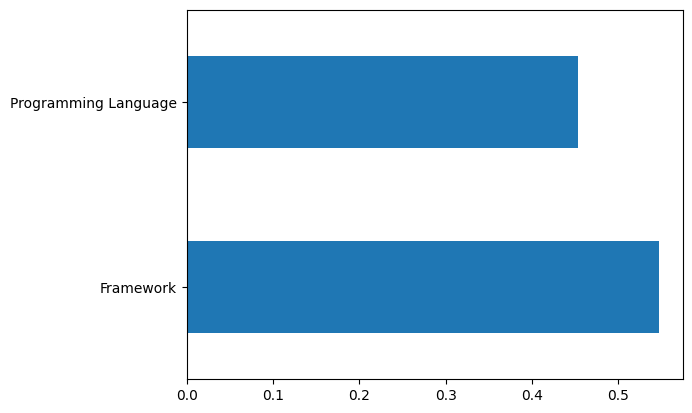

In [101]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
RegModel = DecisionTreeRegressor(max_depth=5)
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[target]=y_test
TestingDataResults[('Predicted'+target)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Service']-TestingDataResults['PredictedService']))/TestingDataResults['Service'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Random Forest

RandomForestRegressor(max_depth=4, n_estimators=400)
R2 Value: 0.0770545255286792

##### Model Validation and Accuracy Calculations ##########
   Programming Language  Framework  Service  PredictedService
0              0.714286   0.727273       12               8.0
1              0.714286   0.545455       13               8.0
2              0.428571   0.000000       13              10.0
3              0.857143   0.545455        7               8.0
4              0.000000   0.545455        3               7.0
Mean Accuracy on test data: 0.9572610225595355
Median Accuracy on test data: 61.53846153846153

Accuracy values for 10-fold Cross Validation:
 [11.10120369  2.76970345  4.61318368 13.66670256  1.432085    6.13044381
  0.25232123 22.25307903 10.46097222 16.53859889]

Final Average Accuracy of the model: 8.92


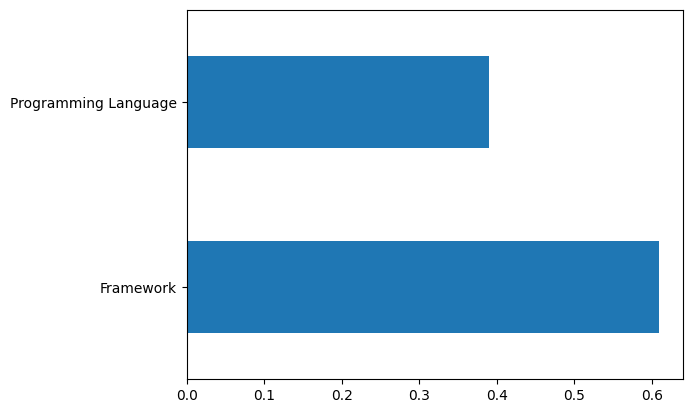

In [102]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400)
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[target]=y_test
TestingDataResults[('Predicted'+target)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Service']-TestingDataResults['PredictedService']))/TestingDataResults['Service'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)


c:\Users\Hriday Goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R2 Value: 0.06730179252765878

##### Model Validation and Accuracy Calculations ##########
   Programming Language  Framework  Service  PredictedService
0              0.714286   0.727273       12               8.0
1              0.714286   0.545455       13               8.0
2              0.428571   0.000000       13              10.0
3              0.857143   0.545455        7               8.0
4              0.000000   0.545455        3               8.0
Mean Accuracy on test data: 0.5255800031919478
Median Accuracy on test data: 61.53846153846153


c:\Users\Hriday Goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Hriday Goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Hriday Goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Hriday Goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Hriday Goswami\AppData\Local\Programs\Python\Python311\Lib\site


Accuracy values for 10-fold Cross Validation:
 [10.41335374  2.21091988  5.04882593 13.16534271  1.28517716  6.29316098
 -0.13843624 22.05133037 10.23626061 16.1629221 ]

Final Average Accuracy of the model: 8.67


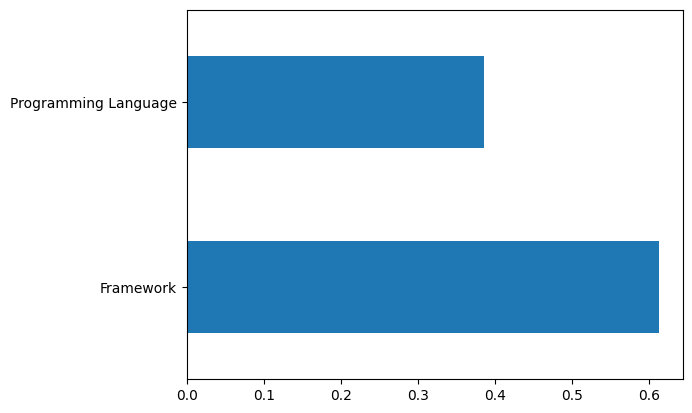

In [103]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[target]=y_test
TestingDataResults[('Predicted'+target)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Service']-TestingDataResults['PredictedService']))/TestingDataResults['Service'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# XGBoost

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)


c:\Users\Hriday Goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:13:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Prediction [ 7.529642   7.8418694  9.66313    7.8054833  6.5645866  9.5768385
  9.990958  11.187925   7.9076066  8.973301  10.014197   9.990958
  8.41596    9.607377   8.980376   7.8552656  7.7166095 10.085922
  9.843135   9.3456135  7.8552656  9.990958   7.9569316  8.898878
  7.390362  10.363575   7.9076066  8.26671    7.8552656  7.010338
  7.9569316  9.5768385  9.3456135  7.010338   7.010338   9.5768385
 11.105286   7.390362   6.5645866  7.707334   7.9076066  9.843135
  8.204975   8.860116  11.517464   8.15623    7.8418694  9.607377
  7.663865   9.985445   7.9076066  9.481046   9.5768385  8.15623
  9.475457   7.9569316  7.8418694  7.813745   7.390362   9.0394
 10.795698   6.5645866  8.15623    7.8552656  7.9076066  8.492962
  7.813745   8.204975   7.347891   8.702567  10.085922   6.664216
  7.707334   7.813745   7.390362   7.8418694  9.029247  11.187925
  8.15623    7.347891   9.818186   9.5768385  7.8054833  7.813745
  9.593643   7.813745   7.813745   7.8552656  7.529642   7.8418694

c:\Users\Hriday Goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:13:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\Hriday Goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:13:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\Hriday Goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:13:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgbo


Accuracy values for 10-fold Cross Validation:
 [10.02787005  3.33116409  5.68261033 14.33133379  2.05835491  5.954988
  0.38195752 22.68562276 11.27306772 16.3210945 ]

Final Average Accuracy of the model: 9.2


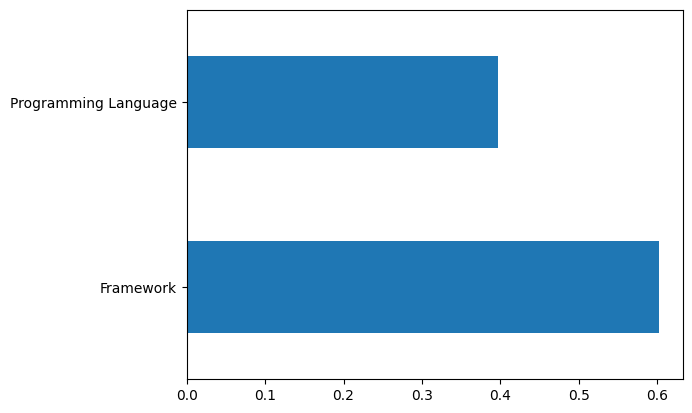

In [104]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, 
                      learning_rate=0.1, 
                      n_estimators=1000, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)
print("Prediction", prediction)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[target]=y_test
TestingDataResults[('Predicted'+target)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Service']-TestingDataResults['PredictedService']))/TestingDataResults['Service'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# KNN

In [105]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor

RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN = RegModel.fit(X_train, y_train)
prediction = KNN.predict(X_test)

from sklearn import metrics

# Measuring Goodness of fit in Training data
print("R2 Value:", metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print("\n##### Model Validation and Accuracy Calculations ##########")

# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[target] = y_test
TestingDataResults[("Predicted" + target)] = np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults["APE"] = 100 * (
    (abs(TestingDataResults["Service"] - TestingDataResults["PredictedService"]))
    / TestingDataResults["Service"]
)

MAPE = np.mean(TestingDataResults["APE"])
MedianMAPE = np.median(TestingDataResults["APE"])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print(
    "Mean Accuracy on test data:", Accuracy
)  # Can be negative sometimes due to outlier
print("Median Accuracy on test data:", MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    # print('#'*70,'Accuracy:', 100-MAPE)
    return 100 - MAPE


# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer

custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print("\nAccuracy values for 10-fold Cross Validation:\n", Accuracy_Values)
print("\nFinal Average Accuracy of the model:", round(Accuracy_Values.mean(), 2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: -0.13090697732375944

##### Model Validation and Accuracy Calculations ##########
   Programming Language  Framework  Service  PredictedService
0              0.714286   0.727273       12               9.0
1              0.714286   0.545455       13              12.0
2              0.428571   0.000000       13              12.0
3              0.857143   0.545455        7               4.0
4              0.000000   0.545455        3               7.0
Mean Accuracy on test data: -7.495082308515151
Median Accuracy on test data: 60.0

Accuracy values for 10-fold Cross Validation:
 [ 7.21546649 -0.79403575 10.86334478 16.60779082  0.2963107   2.4779385
 -4.58201486 19.48335224 12.99012394  9.98345974]

Final Average Accuracy of the model: 7.45


# SVM

In [106]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[target]=y_test
TestingDataResults[('Predicted'+target)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Service']-TestingDataResults['PredictedService']))/TestingDataResults['Service'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.00708565132225758

##### Model Validation and Accuracy Calculations ##########
   Programming Language  Framework  Service  PredictedService
0              0.714286   0.727273       12               9.0
1              0.714286   0.545455       13               9.0
2              0.428571   0.000000       13               9.0
3              0.857143   0.545455        7              10.0
4              0.000000   0.545455        3               7.0
Mean Accuracy on test data: -5.409669448848561
Median Accuracy on test data: 64.28571428571428

Accuracy values for 10-fold Cross Validation:
 [ 4.10858075 -2.09815082 -0.73288454  7.8734577  -6.82125345  1.55558159
 -8.72771649 19.51114269  3.44984937 11.42847226]

Final Average Accuracy of the model: 2.95


# Deployment of Model

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable = "Service"

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors = [
    "Programming Language",
    "Framework",
    "Recommended Instance Type",
    "File Size GB",
    "Storage Used GB",
]

X = ml_data[Predictors].values
y = ml_data[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
# PredictorScaler=StandardScaler()
PredictorScaler = MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit = PredictorScaler.fit(X)

# Generating the standardized values of X
X = PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(4020, 5)
(4020,)


In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor

RegModel = XGBRegressor(
    max_depth=2,
    learning_rate=0.1,
    n_estimators=1000,
    objective="reg:linear",
    booster="gbtree",
)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print("\nAccuracy values for 10-fold Cross Validation:\n", Accuracy_Values)
print("\nFinal Average Accuracy of the model:", round(Accuracy_Values.mean(), 2))

c:\Users\Hriday Goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:09:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\Hriday Goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:09:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\Hriday Goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:09:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgbo


Accuracy values for 10-fold Cross Validation:
 [11.60305701  6.74800504  7.95025483 15.69619961  2.85039105  7.22478889
  4.41736997 23.12953987 13.58625238 20.06364157]

Final Average Accuracy of the model: 11.33


In [ ]:
Final_XGB_Model = RegModel.fit(X, y)

c:\Users\Hriday Goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:45:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open("Final_XGB_Model.pkl", "wb") as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print("pickle file of Predictive Model is saved at Location:", os.getcwd())

pickle file of Predictive Model is saved at Location: d:\College\SEM-8\final-project\test


In [ ]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd

    Num_Inputs = InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    # DataForML = pd.read_pickle(r"./DataForML.pkl")
    DataForML = ml_data.copy()
    InputData = pd.merge(InputData, DataForML)

    # Generating dummy variables for rest of the nominal variables
    InputData = pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors = ["Programming Language", "Framework", "Recommended Instance Type", "File Size GB","Storage Used GB",]

    # Generating the input values to the model
    X = InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X = PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle

    with open(
        r"./Final_XGB_Model.pkl",
        "rb",
    ) as fileReadStream:
        PredictionModel = pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction = PredictionModel.predict(X)
    PredictionResult = pd.DataFrame(Prediction, columns=["Prediction"])
    return PredictionResult

In [ ]:
# Calling the function for some loan applications
NewSampleData = pd.DataFrame(
    data=[[1, 2, 1, 0.005, 5], [1, 2, 1, 0.005, 5]],
    columns=[
        "Programming Language",
        "Framework",
        "Recommended Instance Type",
        "File Size GB",
        "Storage Used GB",
    ]
)

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   Programming Language  Framework  Recommended Instance Type  File Size GB  \
0                     1          2                          1         0.005   
1                     1          2                          1         0.005   

   Storage Used GB  
0                5  
1                5  


ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by MinMaxScaler.

# Performing the same tasks using New Data Generated

In [108]:
actgan_cloud_data = pd.read_csv(r"D:\College\SEM-8\final-project\data\new test data\actgan-cloud.csv")

In [110]:
actgan_cloud_data.drop("Instance ID", axis=1, inplace=True)

In [113]:
actgan_cloud_data.drop("Network Traffic", axis=1, inplace=True)

In [116]:
file_size_original = actgan_cloud_data['File Size']

In [119]:
file_size_formats = []
for i in file_size_original:
    data = i.split(" ")
    # print(data)
    file_size_formats.append(data[1])

In [121]:
list(set(file_size_formats))

['TB', 'GB', 'MB']

In [125]:
file_size_in_mb = []
for i in file_size_original:
    data = i.split(" ")
    if data[1] == "GB":
        file_size_in_mb.append(int(data[0])*1024)
    elif data[1] == "TB":
        file_size_in_mb.append(int(data[0])*1024*1024)
    elif data[1] == "MB":
        file_size_in_mb.append(int(data[0]))
    else:
        print("Invalid")

In [126]:
file_size_in_mb

[20480,
 200,
 5,
 100,
 10240,
 1024,
 10240,
 100,
 2048,
 51200,
 5,
 5,
 51200,
 10240,
 1048576,
 2048,
 5120,
 2048,
 10240,
 10240,
 10240,
 10240,
 20480,
 10240,
 200,
 2048,
 2048,
 100,
 200,
 51200,
 100,
 20480,
 10240,
 1048576,
 5,
 5,
 10240,
 2048,
 5120,
 10240,
 2048,
 1048576,
 2048,
 51200,
 2048,
 1048576,
 20480,
 5120,
 10240,
 10240,
 20480,
 10240,
 1048576,
 200,
 5,
 20480,
 200,
 10240,
 1024,
 2048,
 2048,
 10240,
 5120,
 5,
 200,
 5,
 200,
 10240,
 51200,
 10240,
 20480,
 1048576,
 20480,
 100,
 20480,
 1024,
 51200,
 10240,
 51200,
 10240,
 5120,
 1048576,
 1048576,
 10240,
 1024,
 10240,
 10240,
 10240,
 1048576,
 2048,
 5,
 1048576,
 51200,
 5,
 20480,
 2048,
 51200,
 10240,
 10240,
 10240,
 1048576,
 1048576,
 100,
 10240,
 100,
 5,
 20480,
 1048576,
 200,
 100,
 100,
 5,
 5,
 1024,
 5,
 100,
 2048,
 2048,
 10240,
 2048,
 51200,
 10240,
 5,
 20480,
 51200,
 5,
 2048,
 1024,
 5120,
 5120,
 51200,
 1048576,
 1024,
 2048,
 10240,
 200,
 51200,
 10240,
 5

In [127]:
actgan_cloud_data['File Size']

0        20 GB
1       200 MB
2         5 MB
3       100 MB
4        10 GB
         ...  
4995      1 TB
4996      2 GB
4997     10 GB
4998      5 GB
4999     50 GB
Name: File Size, Length: 5000, dtype: object

In [128]:
actgan_cloud_data['File Size MB'] = file_size_in_mb

In [133]:
storage_used_original = actgan_cloud_data['Storage Used']

In [134]:
storage_used_original

0       100 GB
1         2 TB
2         2 TB
3         2 TB
4        20 GB
         ...  
4995     20 GB
4996      5 GB
4997     50 GB
4998     20 GB
4999      5 GB
Name: Storage Used, Length: 5000, dtype: object

In [135]:
storage_used_in_mb = []
for i in storage_used_original:
    data = i.split(" ")
    if data[1] == "GB":
        storage_used_in_mb.append(int(data[0]) * 1024)
    elif data[1] == "TB":
        storage_used_in_mb.append(int(data[0]) * 1024 * 1024)
    elif data[1] == "MB":
        storage_used_in_mb.append(int(data[0]))
    else:
        print("Invalid")

In [137]:
storage_used_in_mb

[102400,
 2097152,
 2097152,
 2097152,
 20480,
 20480,
 102400,
 10240,
 2048,
 102400,
 2048,
 2048,
 10240,
 10240,
 20480,
 30720,
 20480,
 30720,
 20480,
 20480,
 102400,
 20480,
 20480,
 20480,
 51200,
 2048,
 5120,
 20480,
 102400,
 102400,
 102400,
 20480,
 30720,
 2097152,
 20480,
 20480,
 10240,
 30720,
 10240,
 10240,
 102400,
 2097152,
 2048,
 102400,
 20480,
 20480,
 20480,
 2048,
 30720,
 20480,
 5120,
 10240,
 2097152,
 2048,
 30720,
 10240,
 2097152,
 20480,
 2048,
 2097152,
 10240,
 10240,
 10240,
 2048,
 10240,
 2048,
 20480,
 51200,
 2097152,
 2097152,
 102400,
 2048,
 51200,
 20480,
 2048,
 5120,
 51200,
 2097152,
 102400,
 20480,
 10240,
 2048,
 2097152,
 51200,
 51200,
 2048,
 20480,
 2048,
 2097152,
 2097152,
 20480,
 2097152,
 20480,
 2048,
 2048,
 10240,
 2048,
 20480,
 20480,
 10240,
 2097152,
 102400,
 10240,
 20480,
 10240,
 5120,
 10240,
 2097152,
 2048,
 20480,
 2048,
 2048,
 2048,
 102400,
 2048,
 51200,
 20480,
 30720,
 2097152,
 102400,
 30720,
 51200,
 

In [138]:
actgan_cloud_data['Storage Used MB'] = storage_used_in_mb

In [186]:
new_data = actgan_cloud_data.copy()

In [187]:
new_data.drop(["File Size", "Storage Used"], axis=1, inplace=True)

In [188]:
new_data = new_data[new_data['Framework'] != "Various"]

In [189]:
new_data['Framework'].value_counts()

Framework
Django            714
Spring Boot       514
Django CMS        461
Express.js        389
TensorFlow        326
Apache Airflow    316
AWS Lambda        277
Pandas            240
Multiple          221
React Native      186
Flask             159
Name: count, dtype: int64

In [190]:
new_data['Programming Language'].value_counts()

Programming Language
Python        2570
Node.js        698
HTML/CSS       564
Java           409
Multiple       186
JavaScript     174
Various        158
Name: count, dtype: int64

In [191]:
new_data[new_data['Programming Language'] == "Various"]

,Project Type,Programming Language,Framework,Recommended Services,Additional Services (Optional),File Size MB,Storage Used MB
6,Social Media Platform,Various,Django,S3,-,10240,102400
124,NoSQL Database Application,Various,NaN,Elastic Beanstalk,-,51200,10240
132,Data ETL Pipeline,Various,Flask,Glue,"S3, Redshift",1024,10240
184,Serverless Function,Various,Express.js,API Gateway & Lambda,"DynamoDB, S3",5,20480
186,Microservice,Various,Apache Airflow,API Gateway & Lambda,"DynamoDB, S3",2048,2048
...,...,...,...,...,...,...,...
4840,Static Website,Various,Multiple,EC2 (c5.large),-,1048576,10240
4842,Microservice,Various,Apache Airflow,EC2 (t2.micro) + S3 for product images,RDS (MariaDB),5120,20480
4892,Complex E-commerce Application,Various,NaN,EC2 (m5.large) + RDS (Aurora) + DynamoDB + S3,-,1024,5120
4904,Content Management System (CMS),Various,Django CMS,S3,-,1024,5120


In [192]:
new_data = new_data[new_data["Programming Language"] != "Various"]

In [193]:
new_data['Programming Language'].value_counts()

Programming Language
Python        2570
Node.js        698
HTML/CSS       564
Java           409
Multiple       186
JavaScript     174
Name: count, dtype: int64

In [194]:
new_data[new_data["Programming Language"] == "Multiple"]

,Project Type,Programming Language,Framework,Recommended Services,Additional Services (Optional),File Size MB,Storage Used MB
52,Enterprise Application,Multiple,Spring Boot,"Combination of services (EC2, S3, DynamoDB, RD...","RDS (PostgreSQL), S3",1048576,2097152
71,Enterprise Application,Multiple,Flask,SageMaker,-,1048576,2048
75,Serverless Function,Multiple,NaN,DynamoDB,-,1024,5120
76,Serverless Function,Multiple,Pandas,EC2 (m5.large),-,51200,51200
84,NoSQL Database Application,Multiple,Spring Boot,EC2 (c5.xlarge),DynamoDB,1024,51200
...,...,...,...,...,...,...,...
4940,Microservice,Multiple,Django,EC2 (t2.micro),RDS (MySQL),5,10240
4954,Data Pipeline,Multiple,Multiple,EC2 (t2.micro),RDS (MariaDB),200,51200
4975,Enterprise Application,Multiple,Spring Boot,EC2 (c5.xlarge),"RDS (PostgreSQL), S3",1048576,2097152
4977,Serverless Function,Multiple,Spring Boot,Lambda,"DynamoDB, S3",51200,2097152


In [195]:
new_data = new_data[new_data["Programming Language"] != "Multiple"]

In [196]:
new_data['Programming Language'].value_counts()

Programming Language
Python        2570
Node.js        698
HTML/CSS       564
Java           409
JavaScript     174
Name: count, dtype: int64

In [197]:
new_data[new_data['Framework'].isna()]

,Project Type,Programming Language,Framework,Recommended Services,Additional Services (Optional),File Size MB,Storage Used MB
12,E-commerce Application,Node.js,NaN,EC2 (t2.micro),DynamoDB,51200,10240
20,Mobile Backend,Python,NaN,API Gateway & Lambda,-,10240,102400
25,Social Media Platform,HTML/CSS,NaN,Lambda,-,2048,2048
26,Static Website,HTML/CSS,NaN,S3,-,2048,5120
37,Static Website,HTML/CSS,NaN,S3,-,2048,30720
...,...,...,...,...,...,...,...
4988,Serverless Function,Node.js,NaN,Lambda,-,5,2048
4991,Blog,Python,NaN,Glue,"DynamoDB, S3",10240,10240
4992,Data ETL Pipeline,Python,NaN,DynamoDB,-,20480,30720
4996,Static Website,HTML/CSS,NaN,S3,-,2048,5120


In [198]:
new_data['Programming Language'].replace("Node.js", "JavaScript").value_counts()

Programming Language
Python        2570
JavaScript     872
HTML/CSS       564
Java           409
Name: count, dtype: int64

In [199]:
new_data["Programming Language"].replace("Node.js", "JavaScript", inplace=True)

In [200]:
new_data['Programming Language'].value_counts()

Programming Language
Python        2570
JavaScript     872
HTML/CSS       564
Java           409
Name: count, dtype: int64

In [201]:
new_data['Framework'].value_counts()

Framework
Django            677
Spring Boot       456
Django CMS        446
Express.js        358
TensorFlow        304
Apache Airflow    300
AWS Lambda        256
Pandas            225
Multiple          196
React Native      168
Flask             145
Name: count, dtype: int64

In [202]:
new_data[new_data["Framework"] == "Multiple"]

,Project Type,Programming Language,Framework,Recommended Services,Additional Services (Optional),File Size MB,Storage Used MB
31,Batch Processing Application,JavaScript,Multiple,EC2 (c5.xlarge),-,20480,20480
56,NoSQL Database Application,Java,Multiple,Lambda,-,200,2097152
65,Serverless Function,JavaScript,Multiple,Lambda,DynamoDB,5,2048
123,Data ETL Pipeline,HTML/CSS,Multiple,DynamoDB,-,20480,10240
127,NoSQL Database Application,JavaScript,Multiple,EC2 (t2.micro),-,1024,30720
...,...,...,...,...,...,...,...
4900,Mobile Backend,JavaScript,Multiple,Glue,-,5120,30720
4916,Complex E-commerce Application,Python,Multiple,API Gateway & Lambda,-,10240,20480
4917,Blog,Python,Multiple,Elastic Beanstalk,-,2048,20480
4951,Blog,Python,Multiple,Elastic Beanstalk,-,5120,51200


In [203]:
new_data = new_data[new_data["Framework"] != "Multiple"]

In [204]:
new_data['Framework'].value_counts()

Framework
Django            677
Spring Boot       456
Django CMS        446
Express.js        358
TensorFlow        304
Apache Airflow    300
AWS Lambda        256
Pandas            225
React Native      168
Flask             145
Name: count, dtype: int64

In [208]:
new_data[new_data['Framework'].isna() != True]

,Project Type,Programming Language,Framework,Recommended Services,Additional Services (Optional),File Size MB,Storage Used MB
0,NoSQL Database Application,HTML/CSS,Express.js,DynamoDB,-,20480,102400
2,Data Pipeline,JavaScript,Apache Airflow,DynamoDB,-,5,2097152
3,Enterprise Application,HTML/CSS,Spring Boot,EC2 (c5.xlarge),-,100,2097152
4,Data ETL Pipeline,Python,Apache Airflow,Glue,S3,10240,20480
5,Enterprise Application,Python,Django,EC2 (m5.large) + RDS (Aurora) + DynamoDB + S3,-,1024,20480
...,...,...,...,...,...,...,...
4993,Machine Learning Model,Python,TensorFlow,EC2 (t2.micro),-,200,102400
4994,Blog,Python,Apache Airflow,S3,S3,10240,10240
4995,Mobile Backend,Python,Django,EC2 (c5.large),"RDS (Aurora), S3",1048576,20480
4997,Complex E-commerce Application,Python,Flask,S3,"S3, Redshift",10240,51200


In [209]:
new_data = new_data[new_data["Framework"].isna() != True]

In [211]:
new_data[new_data['Framework'].isna()]

,Project Type,Programming Language,Framework,Recommended Services,Additional Services (Optional),File Size MB,Storage Used MB


In [214]:
new_data[new_data["Programming Language"].isna()]

,Project Type,Programming Language,Framework,Recommended Services,Additional Services (Optional),File Size MB,Storage Used MB


In [218]:
new_data.isna()

,Project Type,Programming Language,Framework,Recommended Services,Additional Services (Optional),File Size MB,Storage Used MB
0,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4993,False,False,False,False,False,False,False
4994,False,False,False,False,False,False,False
4995,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False


In [220]:
new_data['Recommended Services'].value_counts()

Recommended Services
Glue                                                                                        581
Lambda                                                                                      550
EC2 (c5.xlarge)                                                                             320
Elastic Beanstalk                                                                           287
S3                                                                                          260
EC2 (t2.micro)                                                                              255
DynamoDB                                                                                    226
API Gateway & Lambda                                                                        168
Combination of services (EC2, S3, DynamoDB, RDS, etc.) based on specific functionalities    154
SageMaker                                                                                   148
EC2 (m5.large) + RD

In [222]:
new_data[new_data['Recommended Services'] == "Glue"]

,Project Type,Programming Language,Framework,Recommended Services,Additional Services (Optional),File Size MB,Storage Used MB
4,Data ETL Pipeline,Python,Apache Airflow,Glue,S3,10240,20480
8,Blog,Java,Express.js,Glue,S3,2048,2048
13,Machine Learning Model,Python,TensorFlow,Glue,-,10240,10240
14,Data ETL Pipeline,Python,Django,Glue,RDS (MariaDB),1048576,20480
19,Microservice,Python,Pandas,Glue,-,10240,20480
...,...,...,...,...,...,...,...
4969,Content Management System (CMS),Python,React Native,Glue,S3,10240,51200
4983,Machine Learning Model,Java,Flask,Glue,"RDS (PostgreSQL), S3",1048576,2097152
4984,Static Website,Python,React Native,Glue,-,2048,10240
4990,Serverless Function,Python,Django,Glue,-,10240,20480


In [227]:
new_data[new_data['Programming Language'] == "Python"]['Framework'].value_counts()

Framework
Django            531
Django CMS        353
Apache Airflow    245
TensorFlow        235
Pandas            171
Spring Boot       157
AWS Lambda        106
Flask              90
React Native       88
Express.js         84
Name: count, dtype: int64

In [228]:
len(new_data)

3335

In [229]:
new_data[new_data["Programming Language"] == "JavaScript"]["Framework"].value_counts()

Framework
Express.js        212
AWS Lambda        106
Django             81
Spring Boot        73
React Native       50
TensorFlow         42
Django CMS         41
Flask              29
Apache Airflow     28
Pandas             26
Name: count, dtype: int64